# **Objectif:**

To predict the CO2 emissions and total energy consumption of non-residential buildings for which they have not yet been measured.

# **1.Preliminary**

## 1.1 Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

## 1.2 Import Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/P4/2016_Building_Energy_Benchmarking.csv',sep=",")

## 1.3 First Check on the Dataset

### Display

In [ ]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Description for variables:
https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [ ]:
df.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
372,524,2016,NonResidential,Large Office,Plaza 701 N 34th,701 N. 34th Street,Seattle,WA,98103.0,1973200387,6,LAKE UNION,47.64882,-122.34905,1999,1.0,4,243334,103032,140302,"Office, Parking",Office,138995.0,Parking,24549.0,NaN,NaN,201720162012,89.0,62.200001,62.200001,187.399994,187.399994,8.651835e+06,8.651835e+06,0.0,2.378856e+06,8116657.0,5351.779785,535178.0,False,NaN,Compliant,NaN,85.01,0.35
2434,25641,2016,Multifamily LR (1-4),Low-Rise Multifamily,The Sedges at Piper Village,8623 Palatine Ave N,Seattle,WA,98103.0,9231900105,6,NORTHWEST,47.69159,-122.35732,2008,1.0,3,52626,0,52626,Multifamily Housing,Multifamily Housing,40727.0,NaN,NaN,NaN,NaN,NaN,58.0,26.600000,27.700001,83.599998,86.900002,1.084475e+06,1.127248e+06,0.0,3.178414e+05,1084475.0,0.000000,0.0,False,NaN,Compliant,NaN,7.56,0.14
2406,25543,2016,NonResidential,Small- and Mid-Sized Office,Gatzert/Schwabacher,103 1st Ave,Seattle,WA,98104.0,5247800046,7,DOWNTOWN,47.60149,-122.33458,1900,1.0,4,42804,0,42804,"Office, Retail Store",Office,24120.0,Retail Store,6583.0,NaN,NaN,NaN,NaN,50.299999,52.000000,105.199997,110.699997,1.544502e+06,1.598032e+06,0.0,2.255031e+05,769417.0,7750.851074,775085.0,False,NaN,Compliant,NaN,46.53,1.09
327,464,2016,NonResidential,Retail Store,Costco #0001 Seattle,4401 4th Ave South,Seattle,WA,98199.0,2617650020,2,GREATER DUWAMISH,47.56530,-122.33076,2005,1.0,1,158415,0,158415,Retail Store,Retail Store,158415.0,NaN,NaN,NaN,NaN,NaN,25.0,141.399994,147.000000,358.600006,364.500000,2.239442e+07,2.329366e+07,0.0,4.668122e+06,15927634.0,64667.804690,6466780.0,False,NaN,Compliant,NaN,454.49,2.87
1102,20857,2016,Multifamily LR (1-4),Low-Rise Multifamily,Eastlake Gardens Apartments,3230 Eastlake Ave E,Seattle,WA,98102.0,1959703130,3,NORTHEAST,47.65084,-122.32147,1997,1.0,3,45580,0,45580,"Multifamily Housing, Other - Restaurant/Bar, P...",Multifamily Housing,24901.0,Parking,17897.0,Other - Restaurant/Bar,2560.0,NaN,NaN,45.599998,45.599998,143.300003,143.300003,1.287041e+06,1.287041e+06,0.0,3.772100e+05,1287041.0,0.000000,0.0,False,NaN,Compliant,NaN,8.97,0.20


### Structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [ ]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [ ]:
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


### Nan and Duplicated

In [ ]:
df.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [ ]:
df.duplicated().sum()

0

### Data Inspection

In [ ]:
df.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


# **2.Cleaning**

## 2.1 Non-residential Buildings

In [ ]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [ ]:
nr = ['NonResidential', 'Nonresidential COS', 'Nonresidential WA']

In [ ]:
df_nr = df[df['BuildingType'].isin(nr)]
df_nr

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

## 2.2 Variable Selection

In [ ]:
#les émissions de CO2
target1 = ['TotalGHGEmissions']

#la consommation totale d’énergie
target2 = ['SiteEnergyUse(kBtu)']

In [ ]:
df_nr['BuildingAge'] = df_nr['DataYear']-df_nr['YearBuilt']
df_nr.sample(10)

<ipython-input-16-57fcc5faea29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nr['BuildingAge'] = df_nr['DataYear']-df_nr['YearBuilt']


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
1637,22940,2016,NonResidential,Small- and Mid-Sized Office,MERIDIAN NORTH OFFICE BUILDING,10740 MERIDIAN AVE N,Seattle,WA,98133.0,2926049018,5,NORTHWEST,47.70793,-122.33316,1982,1.0,2,27574,0,27574,Office,Office,27574.0,NaN,NaN,NaN,NaN,NaN,73.0,43.900002,45.099998,137.899994,141.600006,1.211349e+06,1.243710e+06,0.0,3.550261e+05,1211349.0,0.000000,0.0,False,NaN,Compliant,NaN,8.44,0.31,34
444,605,2016,NonResidential,Small- and Mid-Sized Office,Lake Union Building,1700 Westlake Ave N,Seattle,WA,98109.0,4088803750,7,LAKE UNION,47.63376,-122.33968,1970,1.0,7,94002,0,94002,"Office, Parking",Office,93905.0,Parking,31348.0,NaN,NaN,NaN,70.0,60.299999,60.299999,189.300003,189.300003,5.662234e+06,5.662234e+06,0.0,1.659506e+06,5662234.0,0.000000,0.0,False,NaN,Compliant,NaN,39.47,0.42,46
335,471,2016,NonResidential,Large Office,428 Westlake,428 Westlake Avenue N.,Seattle,WA,98109.0,1983200245,7,LAKE UNION,47.62286,-122.33804,2004,1.0,6,139282,52582,86700,"Financial Office, Food Service, Office, Other,...",Office,79384.0,Parking,52582.0,Financial Office,3027.0,NaN,96.0,37.299999,37.299999,117.300003,117.300003,3.238216e+06,3.238216e+06,0.0,9.490667e+05,3238216.0,0.000000,0.0,False,NaN,Compliant,NaN,22.57,0.16,12
2781,26922,2016,NonResidential,Residence Hall,Upstairs Downstairs Apartments,4538 18th AVE NE,Seattle,WA,98105.0,8823902795,4,NORTHEAST,47.66238,-122.30801,1976,1.0,3,33448,0,33448,Residence Hall/Dormitory,Residence Hall/Dormitory,33448.0,NaN,NaN,NaN,NaN,NaN,78.0,29.900000,32.099998,93.699997,100.800003,9.986335e+05,1.073833e+06,0.0,2.926827e+05,998633.0,0.000000,0.0,False,NaN,Compliant,NaN,6.96,0.21,40
1777,23396,2016,NonResidential,Other,DWW-SOC 4500 W. Marginal Way SW,4500 W MARGINAL WAY SW,Seattle,WA,98106.0,7666703680,1,Delridge,47.56319,-122.35067,1997,1.0,1,40189,0,40189,"Office, Other - Utility, Parking",Other - Utility,28347.0,Office,9113.0,Parking,0.0,NaN,NaN,40.299999,42.599998,93.699997,96.099998,1.509292e+06,1.594851e+06,0.0,2.699985e+05,921235.0,5880.569824,588057.0,False,NaN,Compliant,NaN,37.65,0.94,19
3144,42069,2016,NonResidential,Small- and Mid-Sized Office,NORTH POINTE,2101 N 34TH ST,Seattle,WA,98103.0,6147900000,4,LAKE UNION,47.64779,-122.33352,1993,1.0,1,26263,0,26263,Office,Office,26263.0,NaN,NaN,NaN,NaN,NaN,64.0,62.200001,63.700001,195.399994,199.899994,1.634669e+06,1.671740e+06,0.0,4.790941e+05,1634669.0,0.000000,0.0,False,NaN,Compliant,NaN,11.40,0.43,23
1326,21530,2016,NonResidential,Small- and Mid-Sized Office,Space Needle Building,203 6th Avenue N,Seattle,WA,98109.0,1991200520,7,LAKE UNION,47.61992,-122.34539,1959,1.0,2,21128,0,21128,Office,Office,21128.0,NaN,NaN,NaN,NaN,NaN,97.0,20.700001,20.700001,64.900002,64.900002,4.366041e+05,4.366041e+05,0.0,1.279613e+05,436604.0,0.000000,0.0,False,NaN,Compliant,NaN,3.04,0.14,57
525,711,2016,NonResidential,Warehouse,08495-Pier 57,1334 Alaskan Way,Seattle,WA,98101.0,7666202440,7,DOWNTOWN,47.60703,-122.34038,1912,1.0,5,154330,0,154330,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,95330.0,NaN,NaN,NaN,NaN,NaN,81.0,13.200000,14.800000,41.599998,46.500000,1.262235e+06,1.411472e+06,0.0,3.699399e+05,1262235.0,0.000000,0.0,False,NaN,Compliant,NaN,8.80,0.06,104
211

In [ ]:
outputpath = "/content/drive/MyDrive/P4/df_nr.csv"
df_nr.to_csv(outputpath, index=False, header=True)

In [ ]:
vars_num = ['TotalGHGEmissions','SiteEnergyUse(kBtu)','GHGEmissionsIntensity','SiteEnergyUseWN(kBtu)',
            'BuildingAge','Latitude','Longitude',
            'NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)',
            'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA',
            'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SteamUse(kBtu)','Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)','NaturalGas(kBtu)']

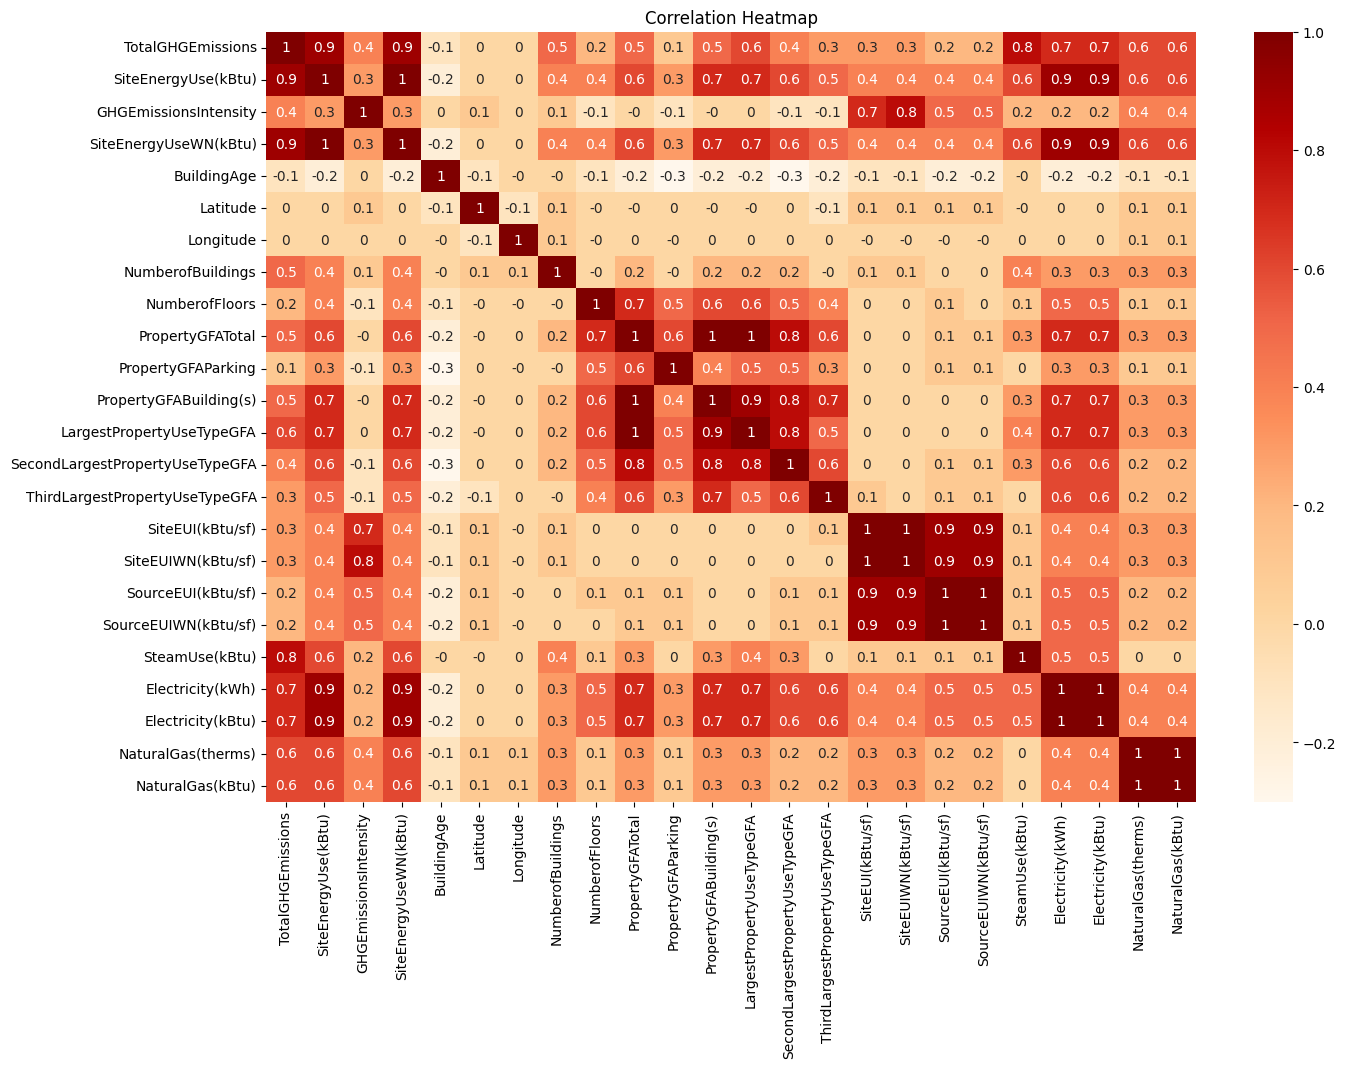

In [ ]:
plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df_nr[vars_num].corr().round(1)
sns.heatmap(corr,cmap="OrRd",annot=True)
plt.show()

**The following numeric variables has a strong linear relation (corr>=|+-0.5|) with "TotalGHGEmissions":**

['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',

'NumberofBuildings',

'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',  

'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)']

**The following numeric variables has a strong linear relation (corr>=|+-0.5|) with "SiteEnergyUse(kBtu)" ('SiteEnergyUseWN(kBtu)' is also considered):**

['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)',

'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',

'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', ]

The heatmap only provides **the linear relationships** among variables.

Therefore, that is not to say that the variables which have a corr smaller than |+-0.5| should not be considered.

---
Although the following variables (**'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)'**) have a strong linear relationship with the target variables, they are measured variables for which the data are not directly available for the future (as the target variable), so they cannot be used as predictors of the target variables.

For these variables, predictions can be made based on their percentages to the target variables.

---
Considering that some numerical variables are repetitive, I only keep the following variables (including categorical variables)：

In [ ]:
cols = ['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge',
        'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
        'ENERGYSTARScore',
        'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

In [ ]:
df_final = df_nr[cols]
df_final.head()

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,Hotel,DOWNTOWN,89,1.0,12,88434,88434,88434.0,60.0,7226362.5,249.98
1,2,Hotel,DOWNTOWN,20,1.0,11,103566,88502,83880.0,61.0,8387933.0,295.86
2,3,Hotel,DOWNTOWN,47,1.0,41,956110,759392,756493.0,43.0,72587024.0,2089.28
3,5,Hotel,DOWNTOWN,90,1.0,10,61320,61320,61320.0,56.0,6794584.0,286.43
4,8,Hotel,DOWNTOWN,36,1.0,18,175580,113580,123445.0,75.0,14172606.0,505.01


## 2.3 The Working Dataset

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 0 to 3375
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              1546 non-null   int64  
 1   PrimaryPropertyType        1546 non-null   object 
 2   Neighborhood               1546 non-null   object 
 3   BuildingAge                1546 non-null   int64  
 4   NumberofBuildings          1544 non-null   float64
 5   NumberofFloors             1546 non-null   int64  
 6   PropertyGFATotal           1546 non-null   int64  
 7   PropertyGFABuilding(s)     1546 non-null   int64  
 8   LargestPropertyUseTypeGFA  1540 non-null   float64
 9   ENERGYSTARScore            1006 non-null   float64
 10  SiteEnergyUse(kBtu)        1544 non-null   float64
 11  TotalGHGEmissions          1544 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 157.0+ KB


In [ ]:
df_final.describe(include="all")

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
count,1546.000000,1546,1546,1546.000000,1544.000000,1546.000000,1.546000e+03,1.546000e+03,1.540000e+03,1006.000000,1.544000e+03,1544.000000
unique,NaN,22,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Small- and Mid-Sized Office,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,292,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16599.864812,NaN,NaN,54.771022,1.036269,4.283959,1.118044e+05,9.798146e+04,9.044408e+04,63.830020,7.642371e+06,164.746962
std,13851.448813,NaN,NaN,32.913763,0.569231,6.783014,1.915023e+05,1.682204e+05,1.561993e+05,28.915866,1.865844e+07,570.764026
min,1.000000,NaN,NaN,1.000000,0.000000,0.000000,1.128500e+04,3.636000e+03,5.656000e+03,1.000000,0.000000e+00,-0.800000
25%,610.250000,NaN,NaN,28.000000,1.000000,1.000000,2.877000e+04,2.770000e+04,2.460000e+04,44.000000,1.204670e+06,19.420000
50%,21212.500000,NaN,NaN,51.000000,1.000000,2.000000,4.730250e+04,4.511350e+04,4.126550e+04,71.000000,2.609590e+06,48.240000
75%,24634.500000,NaN,NaN,87.000000,1.000000,4.000000,1.029090e+05,9.261400e+04,8.873100e+04,89.000000,6.968646e+06,136.272500


### Outliers (valeurs aberrantes)

In [ ]:
df_final[df_final['TotalGHGEmissions']<0]

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
3206,49784,Small- and Mid-Sized Office,CENTRAL,3,1.0,6,52000,52000,48159.0,100.0,342726.0938,-0.8


In [ ]:
df_final = df_final.drop(df_final[df_final['TotalGHGEmissions']<0].index)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 3375
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              1545 non-null   int64  
 1   PrimaryPropertyType        1545 non-null   object 
 2   Neighborhood               1545 non-null   object 
 3   BuildingAge                1545 non-null   int64  
 4   NumberofBuildings          1543 non-null   float64
 5   NumberofFloors             1545 non-null   int64  
 6   PropertyGFATotal           1545 non-null   int64  
 7   PropertyGFABuilding(s)     1545 non-null   int64  
 8   LargestPropertyUseTypeGFA  1539 non-null   float64
 9   ENERGYSTARScore            1005 non-null   float64
 10  SiteEnergyUse(kBtu)        1543 non-null   float64
 11  TotalGHGEmissions          1543 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 156.9+ KB


In [ ]:
cols_num = ['BuildingAge',
        'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
        'ENERGYSTARScore',
        'SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

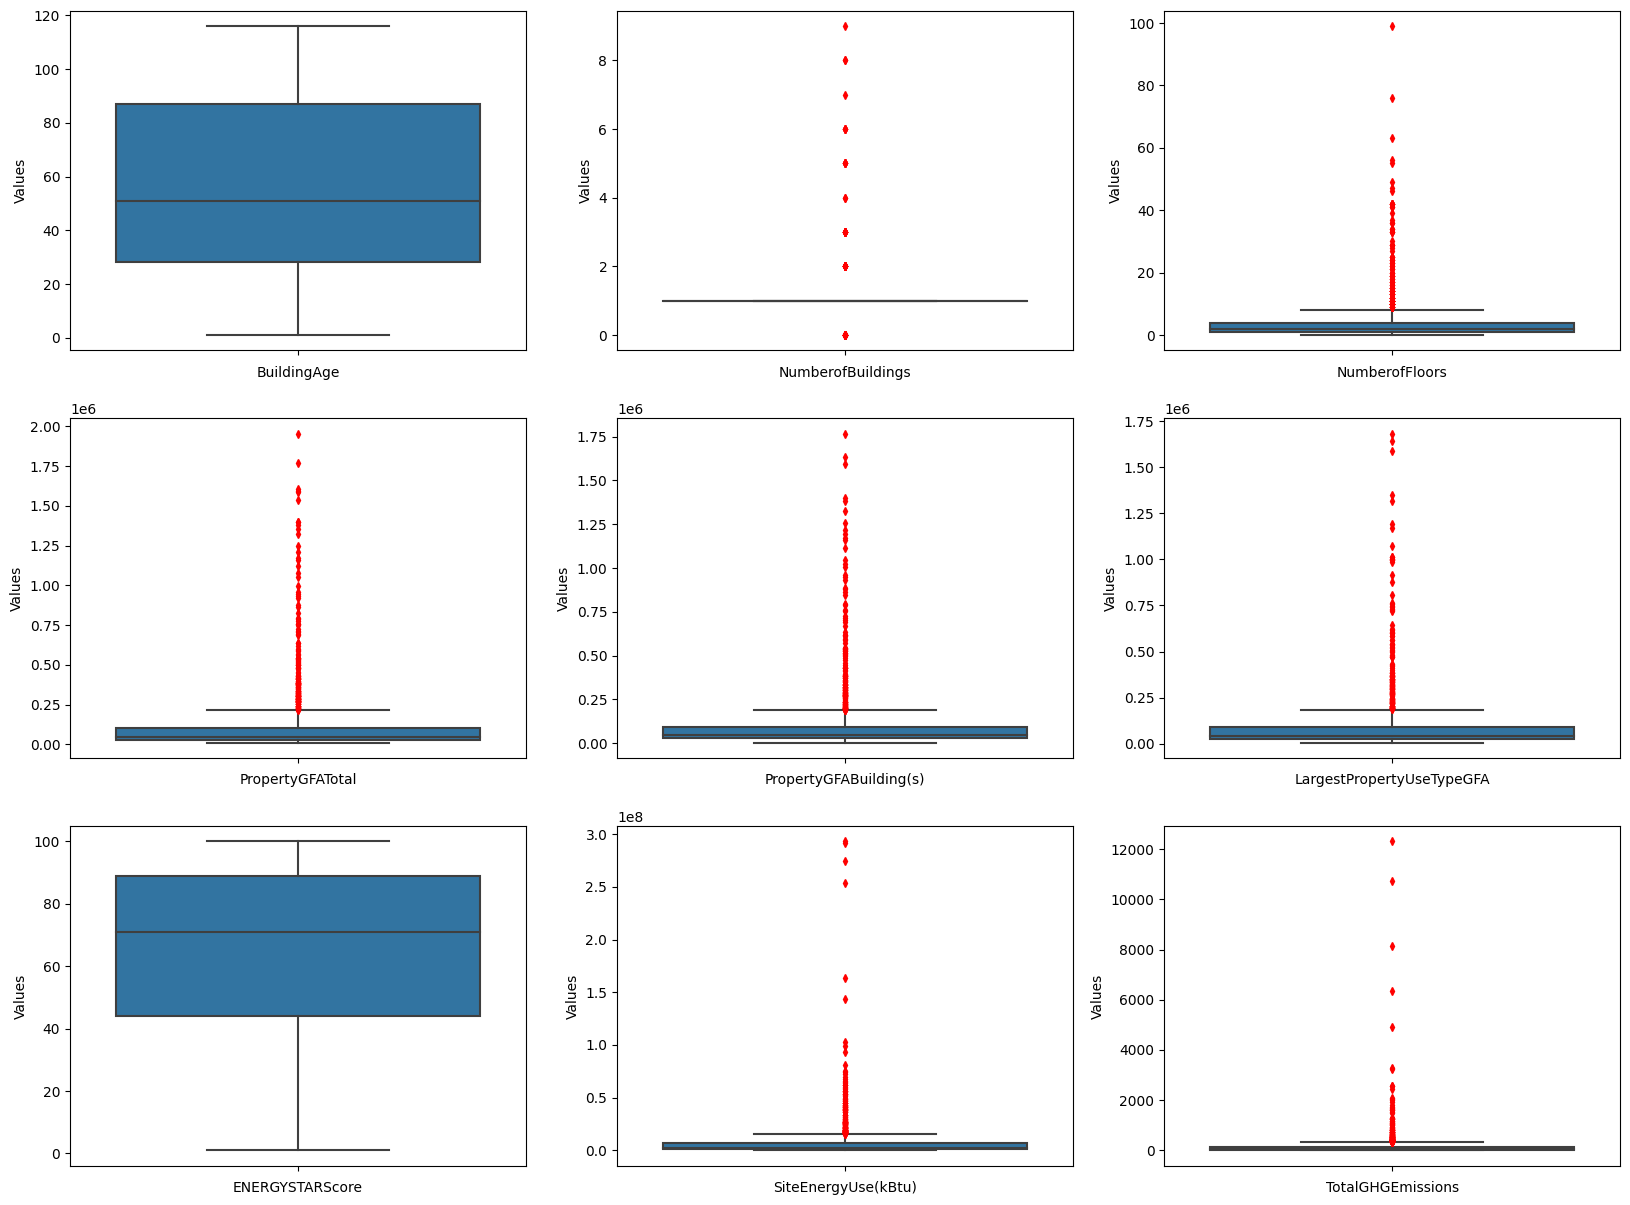

In [ ]:
plt.figure(figsize=(20,15))
for i in range (len(cols_num)):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(data=df_final,y=cols_num[i], flierprops={'markerfacecolor':'red','markeredgecolor':'red','markersize':4})
  plt.xlabel(cols_num[i])
  plt.ylabel("Values")
plt.show()

### Missing Values

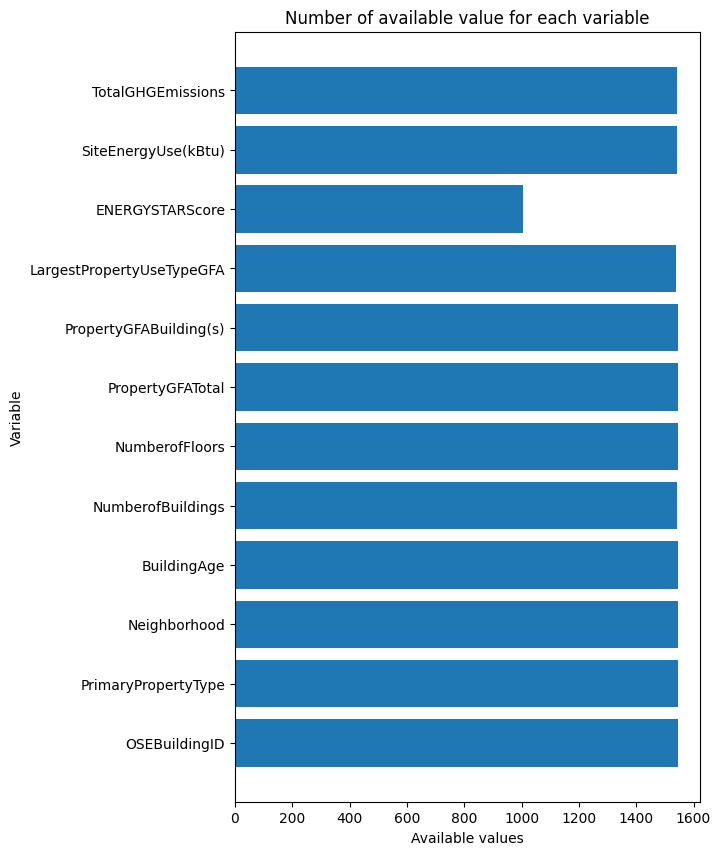

In [ ]:
plt.figure(figsize = (6,10))
x = df_final.columns
y = len(df_final) - df_final.isna().sum()
plt.barh(x,y)
plt.title("Number of available value for each variable")
plt.xlabel("Available values")
plt.ylabel("Variable")
plt.show()

In [ ]:
missing_row = df_final.isnull().sum().sort_values(ascending=False)
missing_row_per = ((df_final.isnull().sum()/df_final.isnull().count()).sort_values(ascending=False))*100
missing = pd.concat([missing_row, missing_row_per], axis=1, keys=['Total Missing', 'Percentage in the dataset (%)'])
missing

,Total Missing,Percentage in the dataset (%)
ENERGYSTARScore,540,34.951456
LargestPropertyUseTypeGFA,6,0.388350
NumberofBuildings,2,0.129450
SiteEnergyUse(kBtu),2,0.129450
TotalGHGEmissions,2,0.129450
OSEBuildingID,0,0.000000
PrimaryPropertyType,0,0.000000
Neighborhood,0,0.000000
BuildingAge,0,0.000000
NumberofFloors,0,0.000000


In [ ]:
df_final[df_final.isnull().T.any()]

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
5,9,Other,DOWNTOWN,17,1.0,2,97288,60090,88830.0,NaN,1.208662e+07,301.81
7,11,Other,DOWNTOWN,90,1.0,8,102761,102761,102761.0,NaN,6.298132e+06,221.51
15,21,Other,DOWNTOWN,12,1.0,11,412000,355000,364913.0,NaN,1.858886e+07,181.38
16,22,Other,DOWNTOWN,86,1.0,6,103911,103911,90000.0,NaN,9.956396e+06,433.86
18,24,Mixed Use Property,DOWNTOWN,109,1.0,5,57452,57452,16442.0,NaN,7.606084e+06,273.02
...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,Other,DELRIDGE NEIGHBORHOODS,34,1.0,1,18261,18261,18261.0,NaN,9.320821e+05,20.33
3372,50223,Other,DOWNTOWN,12,1.0,1,16000,16000,16000.0,NaN,9.502762e+05,32.17
3373,50224,Other,MAGNOLIA / QUEEN ANNE,42,1.0,1,13157,13157,7583.0,NaN,5.765898e+06,223.54
3374,50225,Mixed Use Property,GREATER DUWAMISH,27,1.0,1,14101,14101,6601.0,NaN,7.194712e+05,22.11


In [ ]:
df_final.dropna(axis=0, how='any', inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 3371
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              1003 non-null   int64  
 1   PrimaryPropertyType        1003 non-null   object 
 2   Neighborhood               1003 non-null   object 
 3   BuildingAge                1003 non-null   int64  
 4   NumberofBuildings          1003 non-null   float64
 5   NumberofFloors             1003 non-null   int64  
 6   PropertyGFATotal           1003 non-null   int64  
 7   PropertyGFABuilding(s)     1003 non-null   int64  
 8   LargestPropertyUseTypeGFA  1003 non-null   float64
 9   ENERGYSTARScore            1003 non-null   float64
 10  SiteEnergyUse(kBtu)        1003 non-null   float64
 11  TotalGHGEmissions          1003 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 101.9+ KB


In [ ]:
df_final.reset_index(drop=True,inplace=True)
df_final

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions
0,1,Hotel,DOWNTOWN,89,1.0,12,88434,88434,88434.0,60.0,7.226362e+06,249.98
1,2,Hotel,DOWNTOWN,20,1.0,11,103566,88502,83880.0,61.0,8.387933e+06,295.86
2,3,Hotel,DOWNTOWN,47,1.0,41,956110,759392,756493.0,43.0,7.258702e+07,2089.28
3,5,Hotel,DOWNTOWN,90,1.0,10,61320,61320,61320.0,56.0,6.794584e+06,286.43
4,8,Hotel,DOWNTOWN,36,1.0,18,175580,113580,123445.0,75.0,1.417261e+07,505.01
...,...,...,...,...,...,...,...,...,...,...,...,...
998,50069,Small- and Mid-Sized Office,GREATER DUWAMISH,87,1.0,2,24990,24990,24990.0,9.0,4.420650e+06,134.80
999,50081,K-12 School,GREATER DUWAMISH,1,1.0,3,45000,45000,45728.0,77.0,1.325973e+06,9.24
1000,50210,Office,MAGNOLIA / QUEEN ANNE,64,1.0,1,13661,13661,13661.0,75.0,5.026677e+05,3.50
1001,50220,Office,SOUTHEAST,56,1.0,1,15398,15398,15398.0,93.0,3.878100e+05,7.79


### Distribution

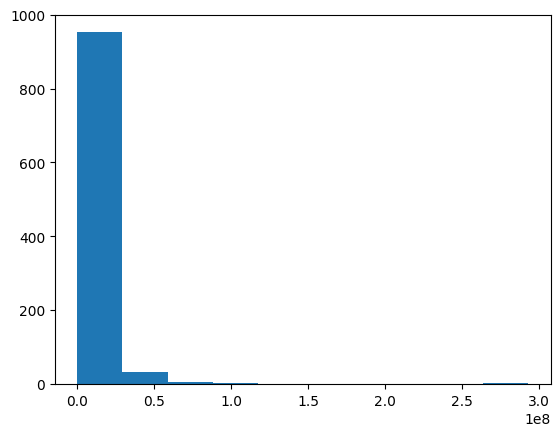

In [ ]:
plt.hist(df_final['SiteEnergyUse(kBtu)'])
plt.show()

In [ ]:
df_final['SiteEnergyUse(kBtu)_log']=np.log(df_final['SiteEnergyUse(kBtu)'])

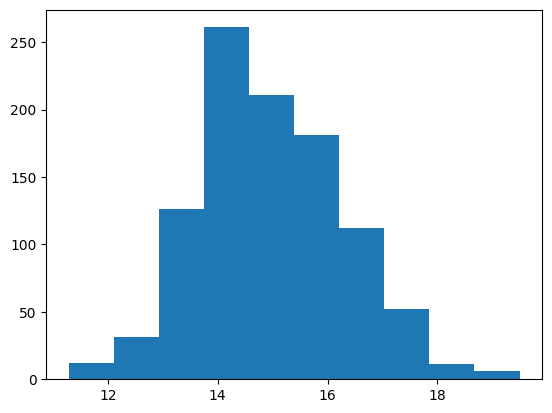

In [ ]:
plt.hist(df_final['SiteEnergyUse(kBtu)_log'])
plt.show()

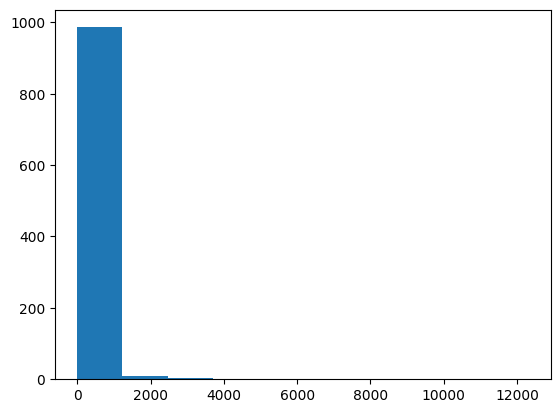

In [ ]:
plt.hist(df_final['TotalGHGEmissions'])
plt.show()

In [ ]:
df_final['TotalGHGEmissions_log']=np.log(df_final['TotalGHGEmissions'])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_final[df_final['TotalGHGEmissions']==0]

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
328,700,Supermarket / Grocery Store,MAGNOLIA / QUEEN ANNE,8,1.0,1,57176,57176,39500.0,31.0,12525174.0,0.0,16.343251,-inf


In [ ]:
df_final = df_final.drop(df_final[df_final['TotalGHGEmissions']==0].index)
df_final.reset_index(drop=True,inplace=True)

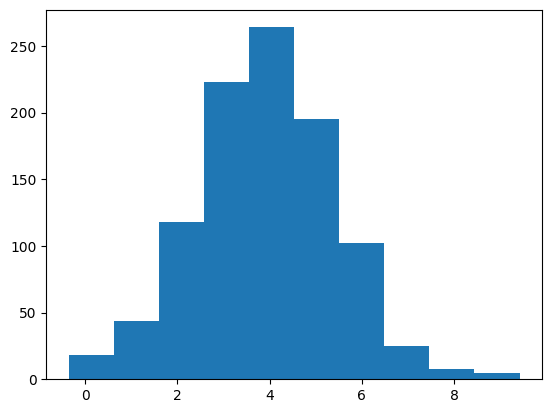

In [ ]:
plt.hist(df_final['TotalGHGEmissions_log'])
plt.show()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              1002 non-null   int64  
 1   PrimaryPropertyType        1002 non-null   object 
 2   Neighborhood               1002 non-null   object 
 3   BuildingAge                1002 non-null   int64  
 4   NumberofBuildings          1002 non-null   float64
 5   NumberofFloors             1002 non-null   int64  
 6   PropertyGFATotal           1002 non-null   int64  
 7   PropertyGFABuilding(s)     1002 non-null   int64  
 8   LargestPropertyUseTypeGFA  1002 non-null   float64
 9   ENERGYSTARScore            1002 non-null   float64
 10  SiteEnergyUse(kBtu)        1002 non-null   float64
 11  TotalGHGEmissions          1002 non-null   float64
 12  SiteEnergyUse(kBtu)_log    1002 non-null   float64
 13  TotalGHGEmissions_log      1002 non-null   float

In [ ]:
outputpath = "/content/drive/MyDrive/P4/df_final.csv"
df_final.to_csv(outputpath, index=False, header=True)